# Import needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [4]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')

# Exploring the Data

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Descriptive Analysis

In [23]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


## Statistical Analysis

In [22]:
data_copy=df.drop("date",axis=1)
def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    return pd.DataFrame(moments)

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(data_copy)


Statistical Moments:

+---------------+------------+-------------+----------------------+------------+------------+
|               |    Mean    |   Median    |  Standard Deviation  |  Skewness  |  Kurtosis  |
+===============+============+=============+======================+============+============+
|      id       | 4.5803e+09 | 3.90493e+09 |     2.87657e+09      |  0.243329  |  -1.26054  |
+---------------+------------+-------------+----------------------+------------+------------+
|     price     |   540088   |   450000    |        367127        |  4.02407   |  34.5855   |
+---------------+------------+-------------+----------------------+------------+------------+
|   bedrooms    |  3.37084   |      3      |       0.930062       |   1.9743   |  49.0637   |
+---------------+------------+-------------+----------------------+------------+------------+
|   bathrooms   |  2.11476   |    2.25     |       0.770163       |  0.511108  |   1.2799   |
+---------------+------------+-------

# Exploratory Data Analysis

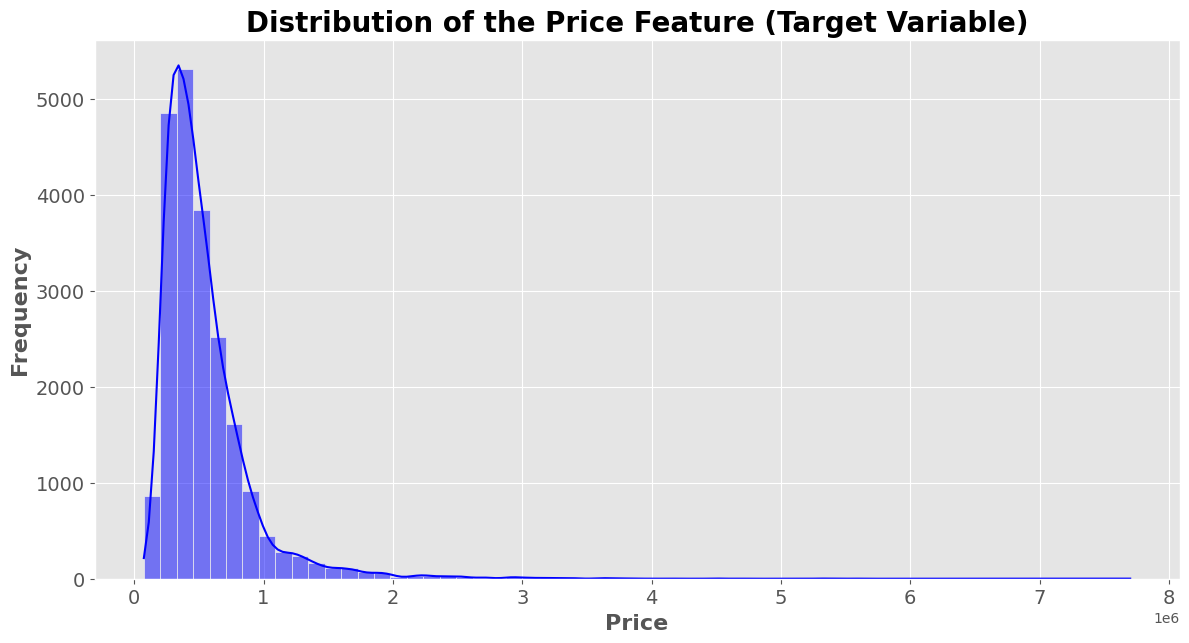

In [9]:
# Set style
plt.style.use('ggplot')

# Define a figure size
plt.figure(figsize=(14, 7))

# Create a histogram with a Kernel Density Estimate (KDE)
sns.histplot(data=df, x='price', color='blue', bins=60, kde=True)

# Title and labels with increased font size for better visibility
plt.title("Distribution of the Price Feature (Target Variable)", fontsize=20, fontweight='bold')
plt.xlabel("Price", fontsize=16, fontweight='bold')
plt.ylabel("Frequency", fontsize=16, fontweight='bold')

# Increase the size of ticks on the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

#### We can see that the most of the price of houses are under 1 million.

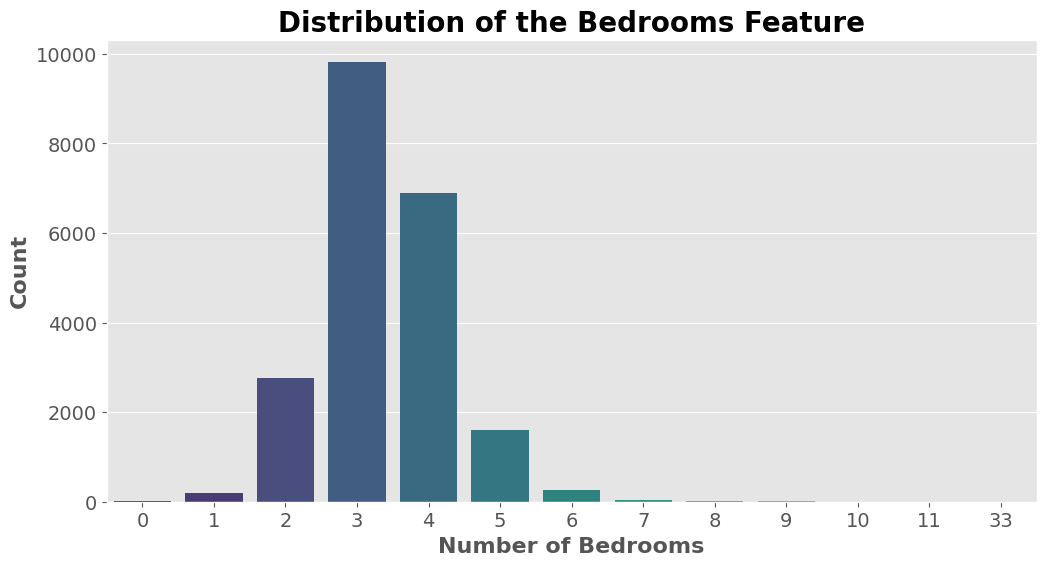

In [10]:
# Set style
plt.style.use('ggplot')

# Define a figure size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=df, x='bedrooms', palette='viridis')

# Title and labels with increased font size for better visibility
plt.title("Distribution of the Bedrooms Feature", fontsize=20, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=16, fontweight='bold')

# Increase the size of ticks on the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

#### In our data we can see that most of the houses bedrooms ranges between 2-5 and 3 bedrooms are the most common among them.

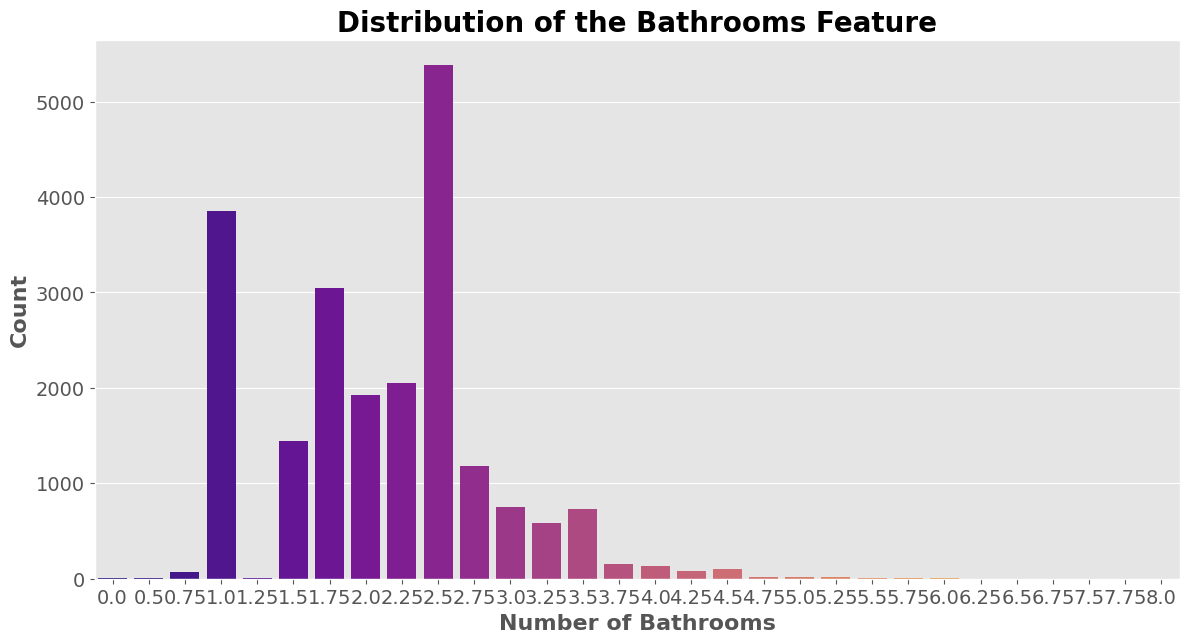

In [12]:
# Set style
plt.style.use('ggplot')

# Define a figure size
plt.figure(figsize=(14, 7))

# Create a count plot with a different color palette
sns.countplot(data=df, x='bathrooms', palette='plasma')

# Title and labels with increased font size for better visibility
plt.title("Distribution of the Bathrooms Feature", fontsize=20, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=16, fontweight='bold')

# Increase the size of ticks on the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

#### We can see that it's giving fraction value however we know that bathrooms in a house must be a integer value.

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

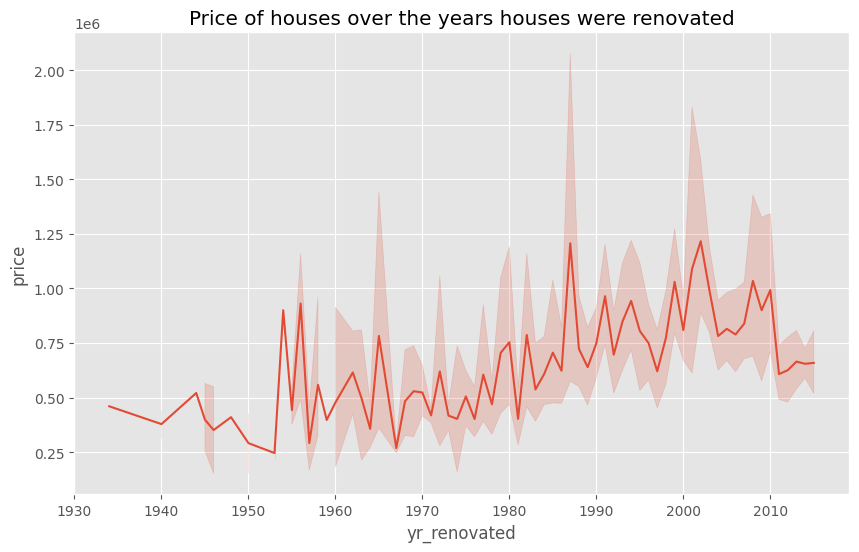

In [13]:
# line plot for year renovated and price between 1900 and 2000
# Assuming df is your DataFrame and it has been imported correctly
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

#### Now we are visualizing line plots, It seems like Prices of the houses which renovated after 1980 has high value.

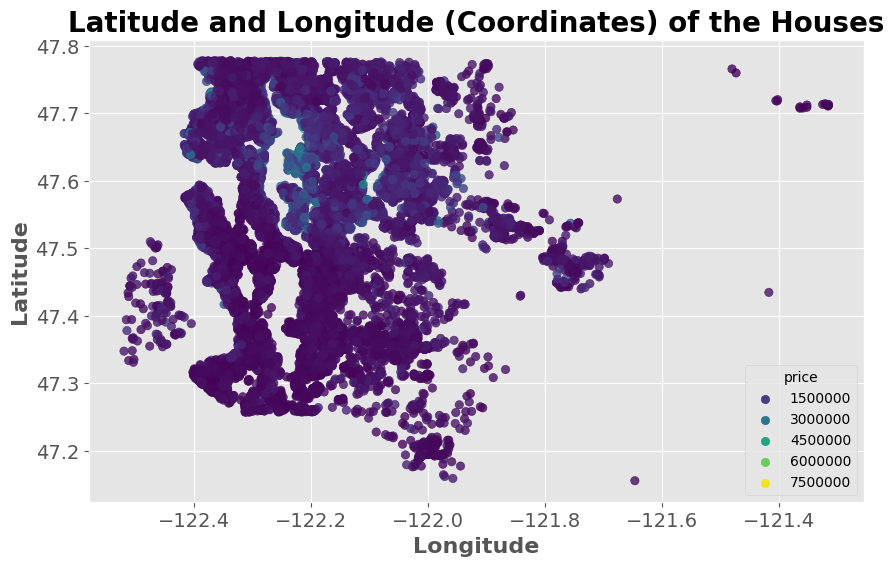

In [15]:
# Set style
plt.style.use('ggplot')

# Define a figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='viridis', alpha=0.8, edgecolor=None)

# Title and labels with increased font size for better visibility
plt.title("Latitude and Longitude (Coordinates) of the Houses", fontsize=20, fontweight='bold')
plt.xlabel("Longitude", fontsize=16, fontweight='bold')
plt.ylabel("Latitude", fontsize=16, fontweight='bold')

# Increase the size of ticks on the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

#### We can see that most of the prices in King County are around 1500000 and there is also interesting at latitude between 47.5-47.7 the price value go high between 3 million to 4.5 million

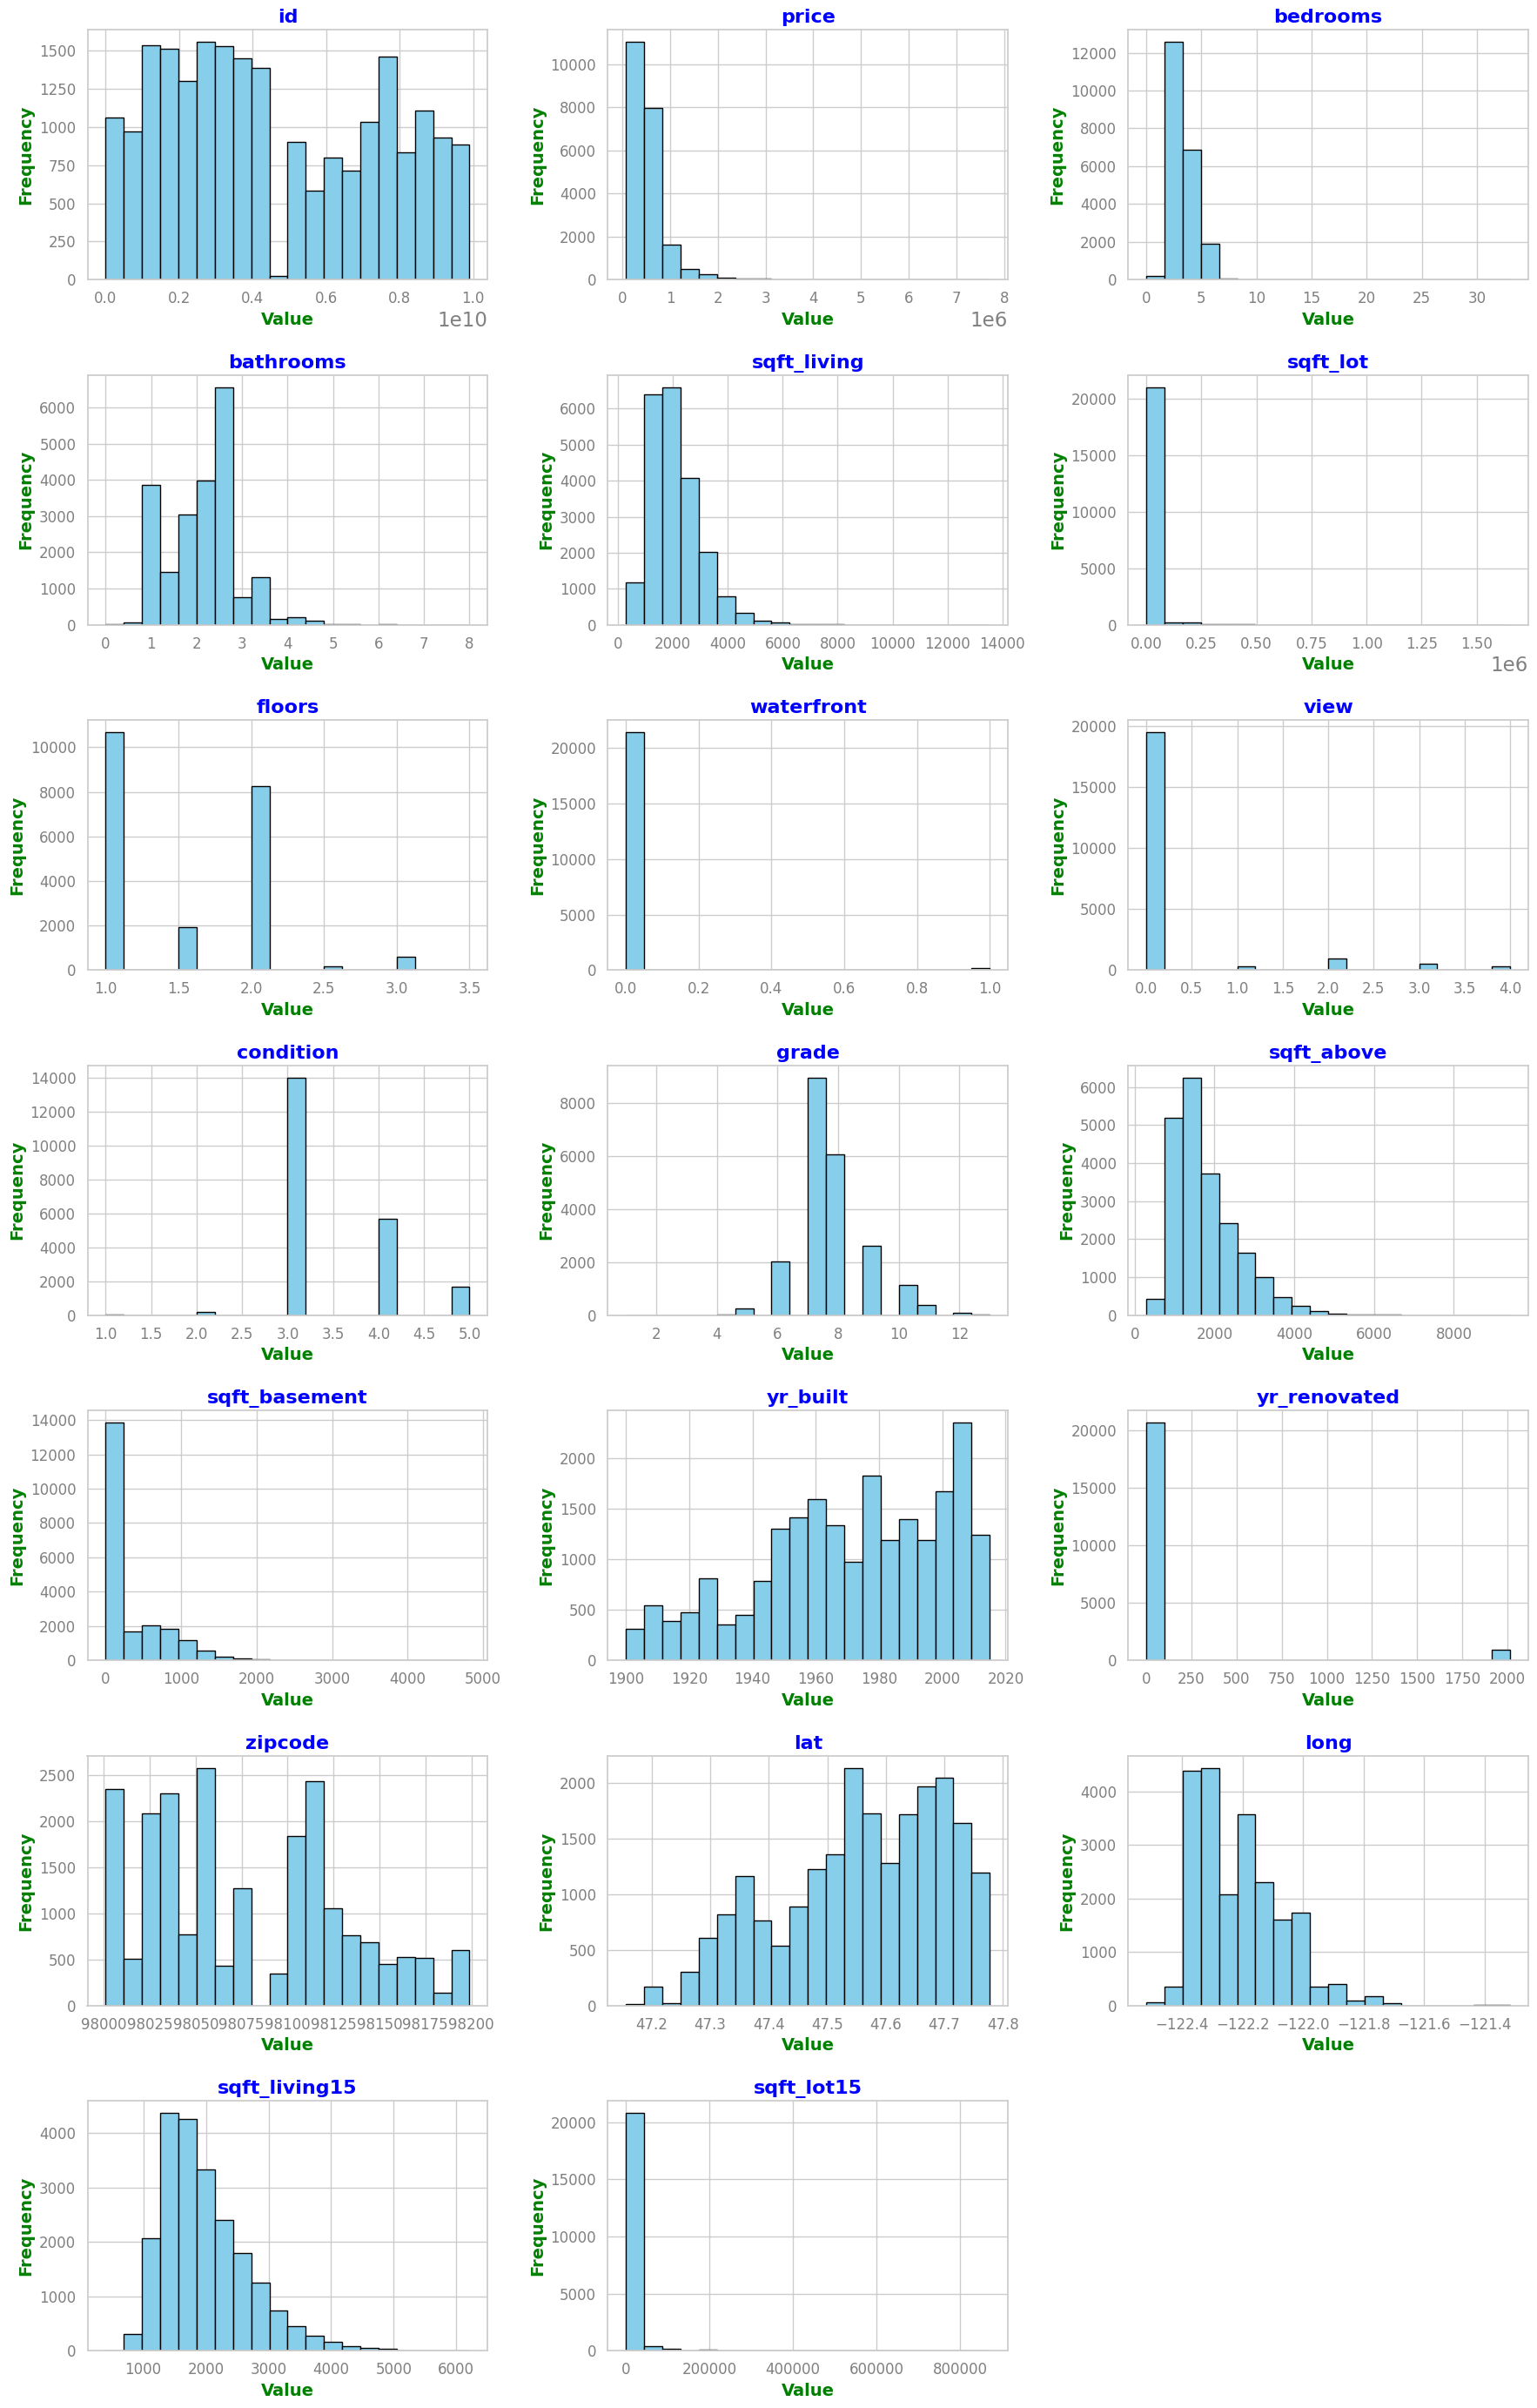

In [24]:
def plot_histograms(data):
    """
    Plot histograms of features to view data distribution.

    Parameters:
    - data (DataFrame): Input data
    """
    # Set style
    sns.set(style='whitegrid', font_scale=1.5)

    # Calculate number of rows and columns for subplots
    num_cols = len(data.columns)
    num_rows = (num_cols + 2) // 3  # Ensure at least 3 columns per row

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 4 * num_rows))

    # Flatten axes for easy iteration
    ax_flat = axes.flatten()

    # Plot histograms for each feature
    for i, col in enumerate(data.columns):
        ax = ax_flat[i]
        ax.hist(data[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(col, fontsize=16, fontweight='bold', color='blue')
        ax.set_xlabel('Value', fontsize=14, fontweight='bold', color='green')
        ax.set_ylabel('Frequency', fontsize=14, fontweight='bold', color='green')
        ax.tick_params(axis='both', which='major', labelsize=12, colors='gray')

    # Hide unused subplots
    for j in range(num_cols, num_rows * 3):
        fig.delaxes(ax_flat[j])

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(data_copy)

#### These plots show the distribution of each feature of our dataframe.

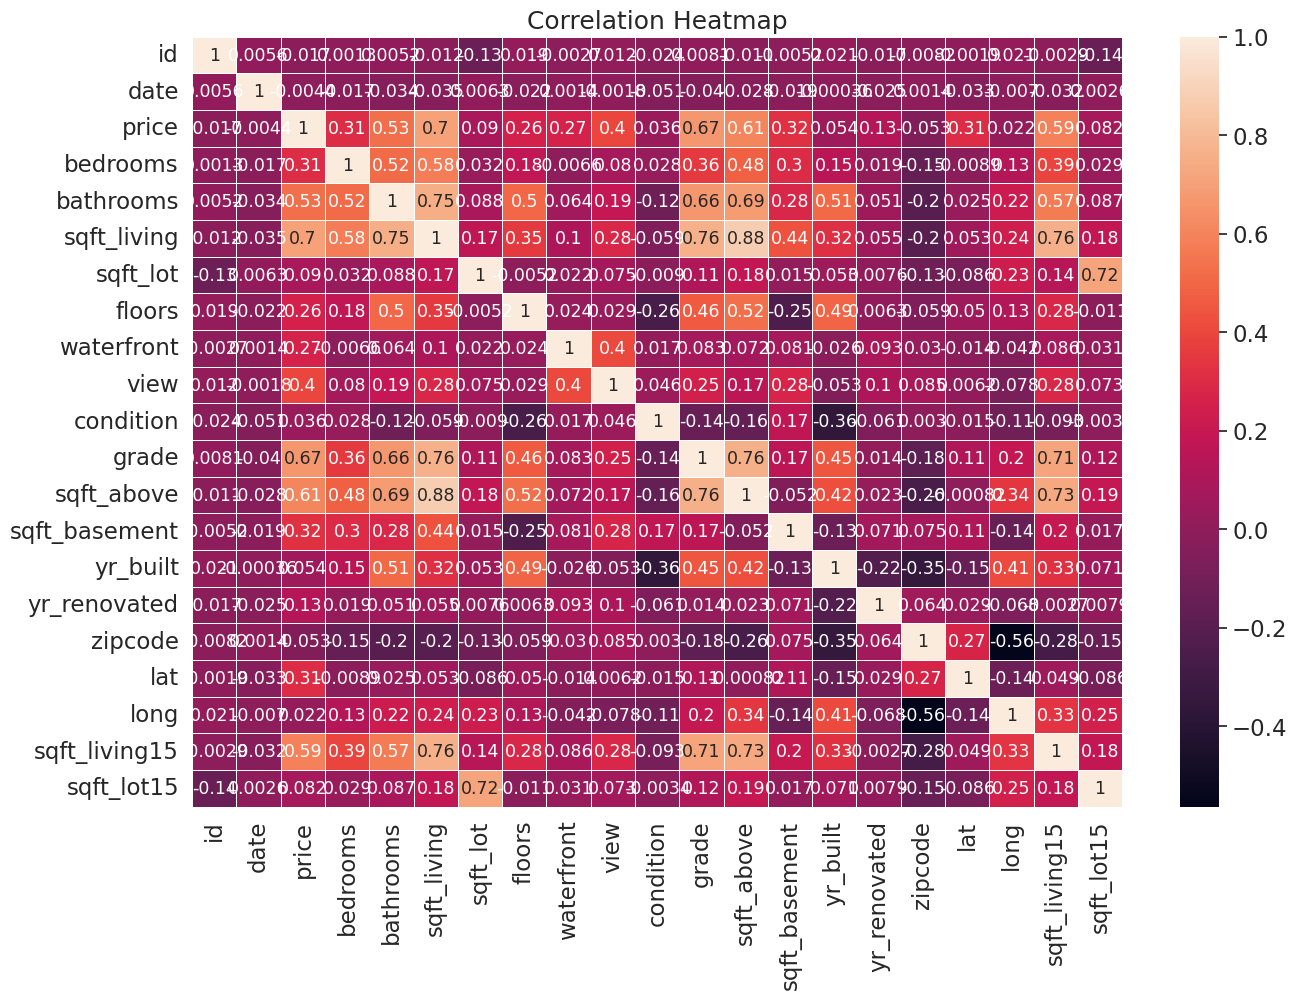

In [32]:
def plot_correlation_heatmap(data):
    """
    Plot a correlation heatmap.

    Parameters:
    - data (DataFrame): Input data
    """
    plt.figure(figsize=(15, 10))
    sns.heatmap(data.corr(), annot=True, annot_kws={'size': 'x-small'}, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation_heatmap(df)

# Building the Model

In [35]:
features = df.drop(columns=['id', 'date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], axis=1)
target_var = df['price'].to_numpy()

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features)
df_scaled

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.21012839,
        -0.35257175, -0.9433552 ],
       [-0.00568792, -0.39873715,  0.1756067 , ...,  4.7466776 ,
         1.16156823, -0.43268619],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.21012839,
         1.28353661,  1.07013975],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.21012839,
         0.24788796, -1.41025258],
       [-0.38158814, -0.39873715,  0.50022075, ..., -0.21012839,
        -0.18441416, -0.8412214 ],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.21012839,
         0.24572284, -1.41025258]])

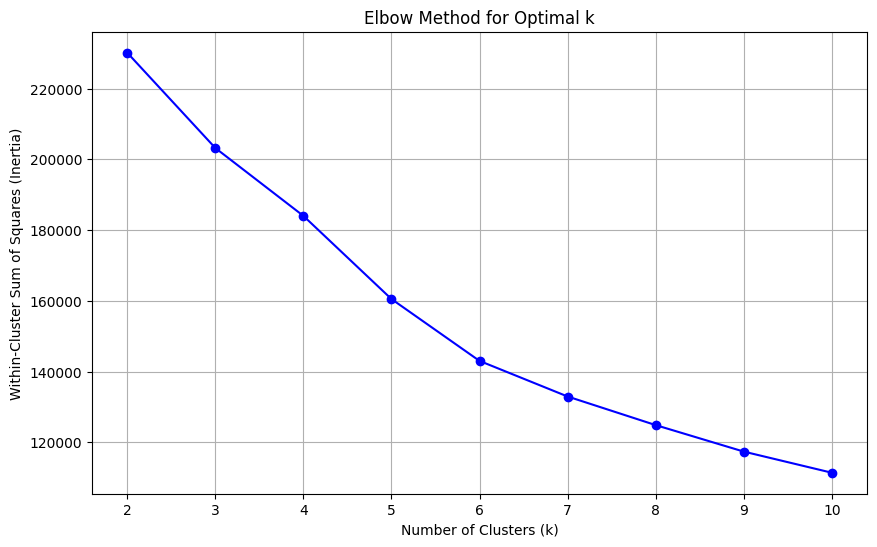

In [37]:
# Extract features for clustering (exclude the 'quality' column)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

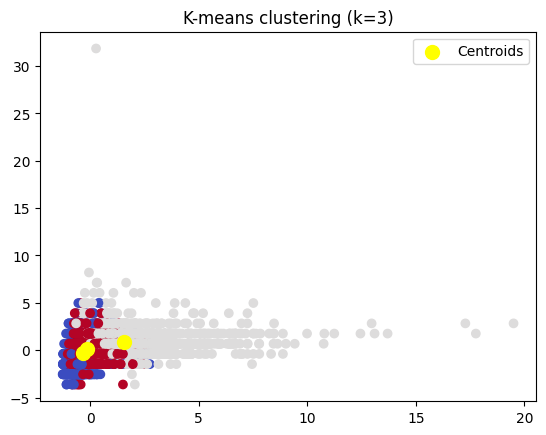

In [38]:
def cluster_plot(k):
    ''' Function that take K (clusters) value and will plot a graph of clusters'''
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=500, n_init=10, random_state=0)
    y_kmeans = kmeans.fit_predict(df_scaled)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=y_kmeans, cmap='coolwarm')
    plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
    plt.title('K-means clustering (k={})'.format(k))
    plt.legend()
    plt.show()
cluster_plot(3)

In [39]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

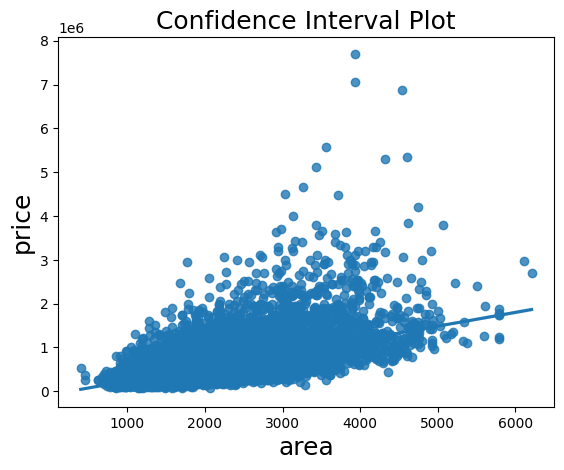

In [40]:
# Plot regplot using seaborn
sns.regplot(x='sqft_living15', y='price', data=df)
plt.title('Confidence Interval Plot', fontsize=18)
plt.xlabel('area', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

In [41]:
X_feature = df[['sqft_living15']]
y_feature = df[['price']]

In [42]:
x = scaler.fit_transform(X_feature)
y = scaler.fit_transform(y_feature)

R-squared: 0.35


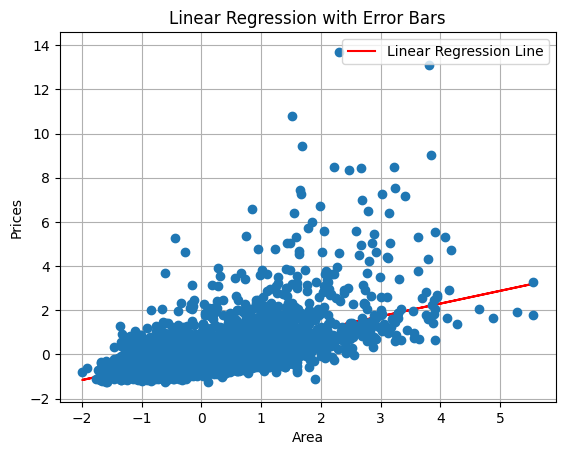

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate confidence interval
confidence = 0.95
squared_errors = (y_pred - y_test) ** 2
mse = np.mean(squared_errors)
std_dev = np.std(squared_errors)
margin_of_error = 1.96 * (std_dev / np.sqrt(len(y_pred)))
confidence_interval = (mse - margin_of_error, mse + margin_of_error)
# Generate random indices to select 20 values
random_indices = np.random.choice(np.arange(3000), size=20, replace=False)
# Plot data points with error bars

plt.errorbar(X_test.flatten(), y_test.flatten(), yerr=margin_of_error, fmt='o', )

# Plot linear regression line
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')

# # Calculate and display R-squared value
r_squared = model.score(X_test, y_test)
print(f'R-squared: {r_squared:.2f}')

plt.xlabel('Area')
plt.ylabel('Prices')
plt.title('Linear Regression with Error Bars')
plt.legend()
plt.grid(True)
plt.show()
